In [11]:
import numpy as np
class GA:
    def __init__(self, population_size = 10, dimension = 10, max_iter = 100, mutation_rate = 0.1):
        #Set parameter
        self.max_iter = max_iter
        self.population_size = population_size
        self.dimension = dimension
        self.chromosone = np.array([np.random.choice(2, dimension) for _ in range(population_size)])
        self.fitnesses = np.zeros(population_size)
        self.parents = []
        self.parents_n = (self.population_size // 3) * 2
        self.copy_index = []
        self.cur_best = []
        self.mutation_rate = mutation_rate

    #fitness function is designed by case!!
    def cal_fitness(self):
        int_dim = 7 #[0, 7]
        for i in range(self.population_size):
            x = []
            for j in range(0, self.dimension, int_dim):
                temp = int("".join(str(bit) for bit in self.chromosone[i][j:j+int_dim]), 2)
                if temp > 100:
                    temp = 100
                x.append(temp)
            self.fitnesses[i] = ((x[0]-6)**2 + (x[1]-17)**2 + (x[2]-8)**2)**0.5
            if i == 0:
                best = self.fitnesses[i]
            elif best > self.fitnesses[i]:
                best = self.fitnesses[i]
        self.cur_best.append(best)

    #Roulette Wheel Selection
    def selection_and_copy(self):
        self.parents = []
        
        fitness_sum = sum(self.fitnesses)
        Whell = [(1 - self.fitnesses[i]/fitness_sum) / (self.population_size-1) for i in range(self.population_size)]
        
        temp = 0
        for i in range(self.population_size):
            temp += Whell[i]
            Whell[i] = temp

        selected_parent = -1
        for i in range(self.parents_n):
            while True:
                R = np.random.random()
                for j in range(self.population_size):
                    if R <= Whell[j]:
                        selected_parent = j
                        break
                if selected_parent not in self.parents:
                    self.parents.append(selected_parent)
                    break
        sorted_index = sorted(range(self.population_size), key=lambda i:self.fitnesses[i])
        self.copy_index = sorted_index[:self.population_size - self.parents_n]

    def crossover(self):
        #filter = [np.random.randint(2) for _ in range(self.dimension)]
        filter = [int(i // np.ceil(self.dimension / 2)) for i in range(self.dimension)]
        childs = []
        for i in range(0, self.parents_n, 2):
            child_1 = np.zeros_like(self.chromosone[0])
            child_2 = np.zeros_like(self.chromosone[0])
            for j in range(self.dimension):
                if filter[j]:
                    child_1[j] = self.chromosone[self.parents[i+1]][j]
                    child_2[j] = self.chromosone[self.parents[i]][j]
                else:
                    child_1[j] = self.chromosone[self.parents[i]][j]
                    child_2[j] = self.chromosone[self.parents[i+1]][j]
            childs.append(child_1)
            childs.append(child_2)
        
        self.chromosone = [self.chromosone[index] for index in self.copy_index]
        for i in range(self.parents_n):
            self.chromosone.append(childs[i])

    def mutation(self):
        for i in range(self.population_size):
            if np.random.random() >= self.mutation_rate:
                continue
            mutation_position = np.random.randint(self.dimension)
            self.chromosone[i][mutation_position] ^= 1

    def run(self):
        self.cal_fitness()
        for iter in range(self.max_iter):
            # if (iter+1) % 5 == 0:
            #     print(f"Iteration:{iter+1}/{self.max_iter}")
            self.selection_and_copy()
            self.crossover()
            self.mutation()
            self.cal_fitness()
            if self.cur_best[iter+1] == 0:
                break

In [15]:
import matplotlib.pyplot as plt
#find minimal in a circle
#(x-3)^2 + (y-4)^2 + (z-5)^2 = t^2
best_avg = 0
iter_avg = 0
find_best = 0
for exp in range(10):
    ga = GA(population_size=10, dimension=21, max_iter=500)
    ga.run()
    # print(f"max_iter:{len(ga.cur_best)-1}")
    # print(f"best:{ga.cur_best[-1]}")
    if ga.cur_best[-1] == 0:
        find_best += 1
    best_avg += ga.cur_best[-1]
    iter_avg += (len(ga.cur_best)-1)
print(f"best_avg:{best_avg / 30}")
print(f"best_avg:{iter_avg / 30}")
print(f"find_best:{find_best}")
# x = range(len(ga.cur_best))
# plt.plot(x, ga.cur_best)
# plt.show()


best_avg:0.5516592158828184
best_avg:148.73333333333332
find_best:3


In [252]:
(7112056462 + 7111056417 + 7112056073 + 7111056273) % 3
if 0.0 == 0:
    print(True)

True


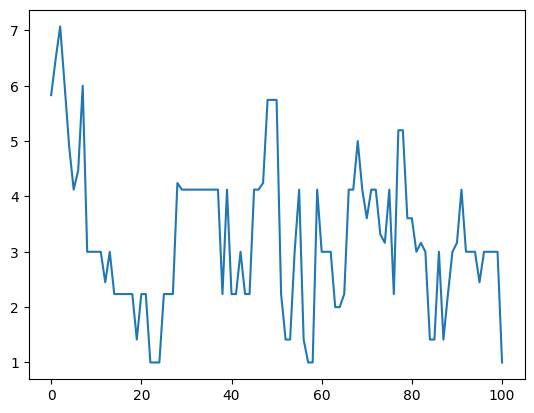

In [154]:
import matplotlib.pyplot as plt
x = range(len(ga.cur_best))
plt.plot(x, ga.cur_best)
plt.show()

In [1]:
from Data_Generate import data_generator
data_generator = data_generator()
w, v = data_generator.data_generate()
print(w, v)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
